<a href="https://colab.research.google.com/github/poorghorban/Classification_Amazon_Find_Food_Reviews/blob/master/classification_amazon_find_food_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Amazon Find Food Reviews**

requirment:
- python 3.x
- pip install pandas
- pip install tensorflow
- pip install keras 
- pip install matplotlib
- pip install nltk
- pip install gensim

##**Step1: Loading Data**

In [ ]:
from google.colab import drive
import pandas as pd 

In [ ]:
## connect to google drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## dataset path 
data_file_path ='/content/drive/My Drive/Google Colab/Amazon Fine Food Reviews/amazon_fine_food_reviews.csv'

In [ ]:
## read data from file 
df = pd.read_csv(data_file_path)

In [ ]:
## show data 
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
## data shape
df.shape

(568454, 10)

In [ ]:
## concate two columns 'Summary' and 'Text'
df['review'] = df['Summary'] + ' ' + df['Text']

In [ ]:
## need two columns 'Score'(label) and 'Summary_Text'(features)
df = df[['Score','review']]

In [ ]:
## new data
df.head()

,Score,review
0,5,Good Quality Dog Food I have bought several of...
1,1,Not as Advertised Product arrived labeled as J...
2,4,"""Delight"" says it all This is a confection tha..."
3,2,Cough Medicine If you are looking for the secr...
4,5,Great taffy Great taffy at a great price. The...


In [ ]:
## data shape
df.shape

(568454, 2)

## **Step2: Analysing Data**

#### **Missing Value**

In [ ]:
## check exsist missing value
df.isnull().sum()

Score      0
review    27
dtype: int64

In [ ]:
## drop rows where at least one element is missing
df = df.dropna()
df.isnull().sum()

Score     0
review    0
dtype: int64

#### **Bar plot score**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
## find unique score and counts
b = df['Score'].value_counts()
score_range , score_counts = list(b.index) , list(b.values)

Text(0.5, 0.98, 'Bar Plot Counts of Score')

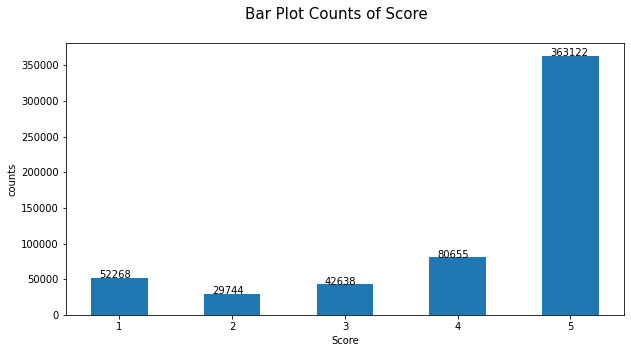

In [ ]:
## bar plot 
plt.figure(figsize=(10,5))
bars = plt.bar(x=score_range , height=score_counts , width=0.5)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in score_range]
xlabs=[i for i in score_range]
plt.xlabel('Score')
plt.ylabel('counts')
plt.xticks(xlocs, xlabs)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.07, yval + 0.005, yval)
plt.suptitle('Bar Plot Counts of Score' , fontsize=15)

#### **Box plot length of text reviews**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
## find length of texts 
len_texts = df['review'].apply(lambda t : len(t)).values

Text(0.5, 0.98, 'Box Plot Length of Text Review')

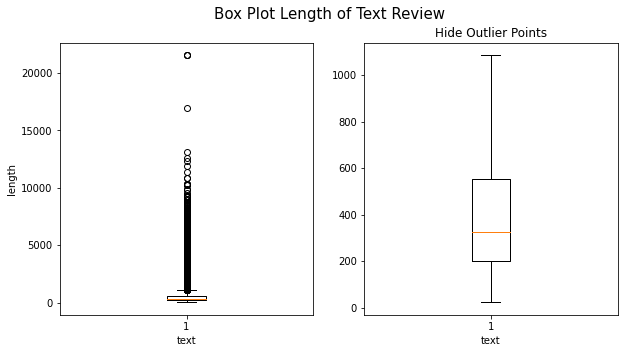

In [ ]:
fig , (ax1,ax2) = plt.subplots(nrows=1 , ncols=2 , figsize=(10,5))
## box plot 
ax1.boxplot(len_texts)
ax1.set_xlabel('text')
ax1.set_ylabel('length')
## box plot with hide outlier points
ax2.boxplot(len_texts , showfliers=False)
ax2.set_title('Hide Outlier Points')
ax2.set_xlabel('text')
plt.suptitle('Box Plot Length of Text Review' , fontsize=15)

## **Step3 : Train and Test Sets**

In [ ]:
## hyperparameter 
training_portion = 0.9

In [ ]:
## split data to train and test sets
train=df.sample(frac=training_portion,random_state=200) #random state is a seed value
test=df.drop(train.index)

In [ ]:
## show train set
train.head()

,Score,review
332577,5,Yummy Delicious :) I was in Publix yesterday ...
306935,4,Okay but not the same as the larger ones I fin...
460063,5,Not just for running Typically a marathon runn...
562071,1,What a waste We tried this product tonight for...
145608,5,You don't know what you are missing If you hav...


In [ ]:
## show test set
test.head()

,Score,review
0,5,Good Quality Dog Food I have bought several of...
2,4,"""Delight"" says it all This is a confection tha..."
9,5,Healthy Dog Food This is a very healthy dog fo...
13,4,fresh and greasy! good flavor! these came secu...
33,4,Good Instant This is a good instant oatmeal fr...


In [ ]:
## show train and test set shape
display(train.shape)
display(test.shape)

(511584, 2)

(56843, 2)

## **Step4: Preprocessing Data**

In [ ]:
import string 
import nltk

In [ ]:
## download nltk library
nltk.download("popular")

In [ ]:
def clean_text(text):
  # convert to lowercase
  text = text.lower()
  # remove punctuation and digits 
  punc_digits = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789\n\t'
  text = text.translate(str.maketrans('','',punc_digits))
  # tokenize 
  tokens = nltk.word_tokenize(text)
  # lemmatize and remove stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  lemmatizer = nltk.stem.WordNetLemmatizer()
  new_text = ''
  for token in tokens:
    # word rooting
    token = lemmatizer.lemmatize(token)
    if token not in stopwords:
      # not stopword add to array
      new_text = new_text + ' ' + token
  return new_text

In [ ]:
## preprocessing train set 
train['review'] = train['review'].map(lambda t: clean_text(t))

In [ ]:
## show train set
train.head()

,Score,review
332577,5,yummy delicious wa publix yesterday saw start...
306935,4,okay larger one find small ounce one stringy ...
460063,5,running typically marathon runner bread butte...
562071,1,waste tried product tonight first time disapp...
145608,5,dont know missing never cuppa earl grey tea m...


In [ ]:
## preprocessing test set
test['review'] = test['review'].apply(lambda t: clean_text(t))

In [ ]:
## show test set
test.head()

,Score,review
0,5,good quality dog food bought several vitality...
2,4,delight say confection ha around century ligh...
9,5,healthy dog food healthy dog food good digest...
13,4,fresh greasy good flavor came securely packed...
33,4,good instant good instant oatmeal best oatmea...


## **Step5: Extract Features**

In [ ]:
## hyperparameters 
max_length = 200
oov_token = '<OOV>'
trunc_type = 'post'
padding_type = 'post'
embedding_dim = 100

#### **Text Data Vectorization**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
## create tokenizer
tokenizer = Tokenizer(oov_token= oov_token)
tokenizer.fit_on_texts(train['review'])

In [ ]:
## list of word index 
word_index = tokenizer.word_index 
display(len(word_index))
display(dict(list(word_index.items())[0:10]))

213145

{'<OOV>': 1,
 'br': 4,
 'flavor': 10,
 'good': 5,
 'great': 6,
 'like': 3,
 'love': 8,
 'product': 9,
 'taste': 7,
 'wa': 2}

In [ ]:
## convert text to vector with same size 
train_sequences = tokenizer.texts_to_sequences(train['review'])
x_train = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type , truncating=trunc_type)
y_train = train['Score'].to_numpy().reshape((-1,1))

In [ ]:
## train set shape 
display(x_train.shape)
display(y_train.shape)

(511584, 200)

(511584, 1)

In [ ]:
## convert text to vector with same size 
test_sequences = tokenizer.texts_to_sequences(test['review'])
x_test = pad_sequences(test_sequences,maxlen=max_length,padding=padding_type , truncating=trunc_type)
y_test = test['Score'].to_numpy().reshape((-1,1))

In [ ]:
## test set shape
display(x_test.shape)
display(y_test.shape)

(56843, 200)

(56843, 1)

#### **Embedding Matrix with Word2Vec**

In [ ]:
from gensim.models import Word2Vec
import numpy as np 
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
vocab_size = len(word_index)+1

In [ ]:
## convert text to list of words
docs = []
for doc in train['review'].tolist(): 
  docs.append(doc.split())

In [ ]:
## create model 
model = Word2Vec(docs ,min_count=1, size=embedding_dim , window=5,workers=8)
print(model)

Word2Vec(vocab=213144, size=100, alpha=0.025)


In [ ]:
vocabulary = list(model.wv.vocab)
vectors = model[model.wv.vocab]

In [ ]:
## create dictionary (key , value) - emdeddings_index(word , vector)
embeddings_index = {}
for i , word in enumerate(vocabulary):
  embeddings_index[word] = vectors[i]

In [ ]:
## convert word in word_index to vector
embedding_matrix = np.random.random((vocab_size, embedding_dim))
print(embedding_matrix.shape)
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

(213146, 100)


## **Step6: Training Model**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding , Bidirectional , LSTM , Dense , Dropout
from tensorflow.keras.initializers import Constant

In [ ]:
## create model 
model = Sequential([
                    Embedding(vocab_size,embedding_dim,input_length=max_length , embeddings_initializer=Constant(embedding_matrix) , trainable=False),
                    LSTM(embedding_dim ,return_sequences=False),
                    Dense(128 , activation='relu'),
                    Dropout(0.5),
                    Dense(64 , activation='relu'),
                    Dense(6,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          21314600  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 21,416,574
Trainable params: 101,974
Non-trainable params: 21,314,600
______________________________________

In [ ]:
## compile model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [49]:
## fit model 
history = model.fit(x=x_train , y=y_train ,validation_split=0.2, epochs=4 ,verbose=1)

Epoch 1/4
12790/12790 [==============================] - 1947s 152ms/step - loss: 1.1348 - accuracy: 0.6386 - val_loss: 1.1283 - val_accuracy: 0.6409
Epoch 2/4
12790/12790 [==============================] - 1965s 154ms/step - loss: 0.7920 - accuracy: 0.7082 - val_loss: 0.7029 - val_accuracy: 0.7397
Epoch 3/4
12790/12790 [==============================] - 1953s 153ms/step - loss: 0.6825 - accuracy: 0.7432 - val_loss: 0.6759 - val_accuracy: 0.7480
Epoch 4/4
12790/12790 [==============================] - 1950s 152ms/step - loss: 0.6475 - accuracy: 0.7570 - val_loss: 0.6510 - val_accuracy: 0.7565


In [50]:
## save model 
model.save('/content/drive/My Drive/Google Colab/Amazon Fine Food Reviews/model.h5')

## **Step7: Evaluating Model**

In [51]:
import matplotlib.pyplot as plt

#### **Plot Accuracy and Loss (train-validation)**

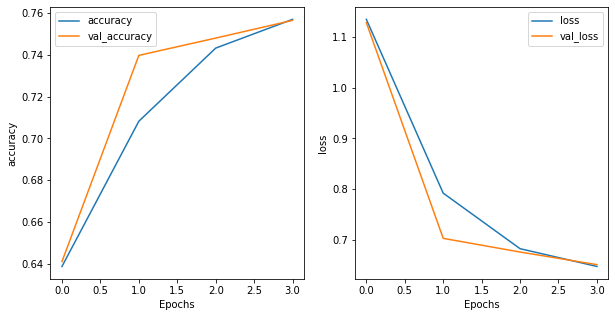

In [52]:
fig , (ax1 , ax2) = plt.subplots(nrows=1 , ncols=2,figsize=(10,5))
# plot accuracy 
ax1.plot(history.history["accuracy"],label="accuracy")
ax1.plot(history.history["val_accuracy"],label="val_accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("accuracy")
ax1.legend()
# plot loss
ax2.plot(history.history["loss"] , label="loss")
ax2.plot(history.history["val_loss"] , label = "val_loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("loss")

ax2.legend()
plt.show()

#### **Evaluate Test Set**

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np 

In [58]:
## predict score x_test
y_pred = np.argmax(model.predict(x_test),axis=-1)

In [59]:
y_pred

array([5, 5, 5, ..., 1, 5, 5])

In [61]:
## metrics 
print(classification_report(y_test.ravel(),y_pred,target_names=['class 1','class 2','class 3','class 4','class 5']))

              precision    recall  f1-score   support

     class 1       0.75      0.62      0.68      5142
     class 2       0.36      0.37      0.36      2958
     class 3       0.44      0.39      0.42      4277
     class 4       0.55      0.26      0.35      8073
     class 5       0.83      0.96      0.89     36393

    accuracy                           0.76     56843
   macro avg       0.59      0.52      0.54     56843
weighted avg       0.73      0.76      0.73     56843



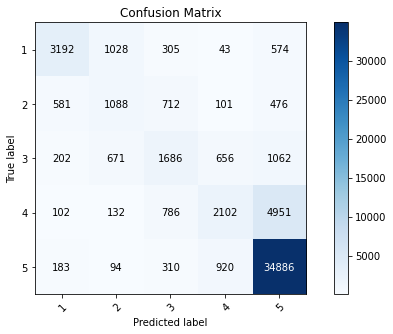

In [65]:
## confusion matrix 

fig , ax = plt.subplots(nrows=1 , ncols=1,figsize=(10,5))
cm = confusion_matrix(y_test.ravel(), y_pred)
im = ax.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
                            yticks=np.arange(cm.shape[0]),
                            xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5],
                            title='Confusion Matrix',
                            ylabel='True label',
                            xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                        rotation_mode="anchor")
fmt ='d'
thresh = cm.max() / 2.
for w in range(cm.shape[0]):
  for z in range(cm.shape[1]):
    ax.text(z, w, format(cm[w, z], fmt),
            ha="center", va="center",
            color="white" if cm[w, z] > thresh else "black")
plt.show()